X part : 
 [[ 94.    96.    62.    84.  ]
 [ 97.    99.    52.    82.67]
 [ 50.    74.    66.    63.33]
 [ 53.    90.    87.    76.67]
 [ 53.    72.    71.    65.33]
 [ 89.   100.    88.    92.33]
 [ 59.    79.    89.    75.67]
 [ 69.    90.    59.    72.67]
 [ 71.    95.    75.    80.33]
 [100.   100.    98.    99.33]
 [ 86.    66.    64.    72.  ]
 [ 73.    89.    63.    75.  ]
 [ 56.    61.   100.    72.33]
 [ 74.    82.    96.    84.  ]
 [ 74.    90.    97.    87.  ]
 [ 62.    77.    59.    66.  ]
 [ 51.    62.    76.    63.  ]
 [ 88.    64.    98.    83.33]
 [ 89.   100.    69.    86.  ]
 [ 73.    63.    90.    75.33]
 [ 96.    51.    57.    68.  ]
 [ 74.    81.    63.    72.67]
 [ 67.    98.    63.    76.  ]
 [ 87.    99.    76.    87.33]
 [ 75.    59.    52.    62.  ]
 [ 63.    91.    62.    72.  ]
 [ 58.    64.    60.    60.67]
 [ 59.    65.    51.    58.33]
 [ 70.    61.    57.    62.67]
 [ 66.    54.    99.    73.  ]
 [ 55.    83.    63.    67.  ]
 [ 65.    95.    70.    76.6

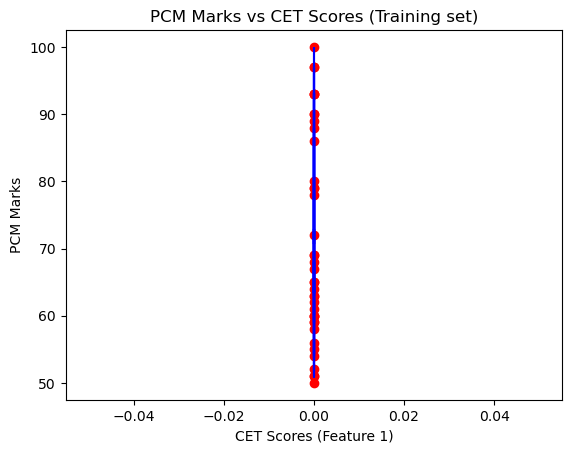

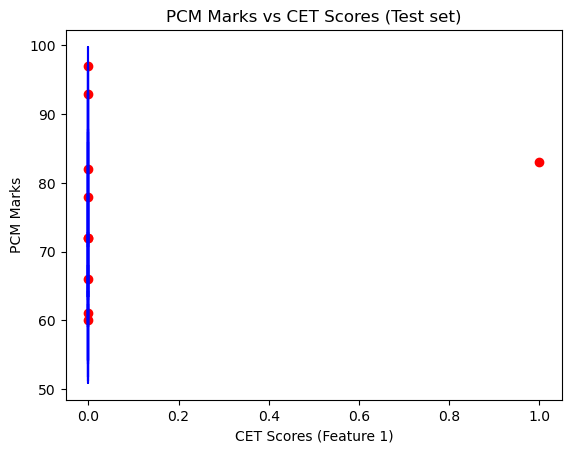

In [6]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('large_student_dataset.csv')
subdata = dataset.head(50)
X = subdata.iloc[:, 2:6].values
y = subdata.iloc[:, -1].values
print("X part : \n",X)

if len(X) == 1 or len(y) == 1:
  raise ValueError("Input data has only one element. Cannot be split.")
    
# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Visualizing the Training set results (using the first feature for simplicity)
plt.scatter(X_train[:, 0], y_train, color='red')  # Plotting against the first feature (e.g., 'CET Scores')
plt.plot(X_train[:, 0], regressor.predict(X_train), color='blue')  # Predictions based on the first feature
plt.title('PCM Marks vs CET Scores (Training set)')
plt.xlabel('CET Scores (Feature 1)')
plt.ylabel('PCM Marks')
plt.show()

# Visualizing the Test set results (using the first feature for simplicity)
plt.scatter(X_test[:, 0], y_test, color='red')  # Plotting against the first feature (e.g., 'CET Scores')
plt.plot(X_train[:, 0], regressor.predict(X_train), color='blue')  # Keeping the same line as the training set for consistency
plt.title('PCM Marks vs CET Scores (Test set)')
plt.xlabel('CET Scores (Feature 1)')
plt.ylabel('PCM Marks')
plt.show()
